<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Images/Image%20Segmentation/TensorFlow_2_0_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [22]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [23]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
from __future__ import absolute_import, print_function, unicode_literals, division

import numpy as np 
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from tensorflow_examples.models.pix2pix import pix2pix
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
dataset, info = tfds.load('oxford_iiit_pet:3.0.0', with_info=True)

In [0]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [27]:
dataset['train'].element_spec

{'file_name': TensorSpec(shape=(), dtype=tf.string, name=None),
 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'label': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None)}

In [0]:
@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128,128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'],(128,128))

    if tf.random.uniform(())>0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

In [0]:
@tf.function
def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint["image"], (128,128))
    input_mask = tf.image.resize(datapoint["segmentation_mask"], (128,128))
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

In [0]:
TRAIN_LENGTH = info.splits["train"].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [0]:
train = dataset['train'].map(load_image_train, num_parallel_calls = tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [0]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.cache().batch(BATCH_SIZE)
test_dataset = test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [0]:
def display(display_list):
    plt.figure(figsize=(15,15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis("off")
    plt.show()

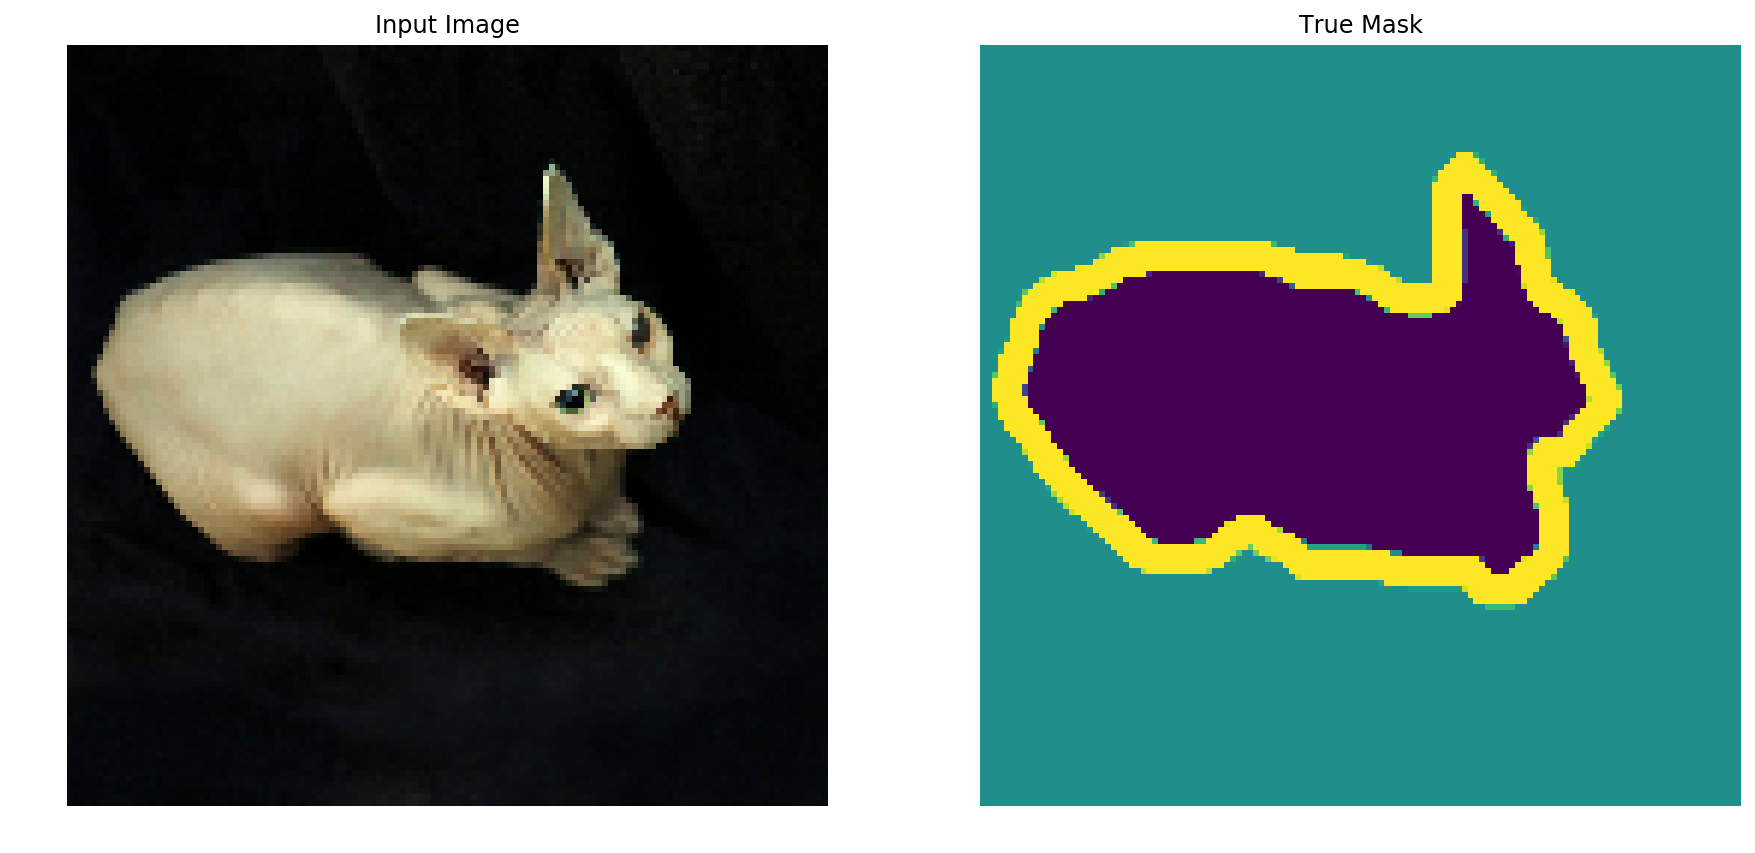

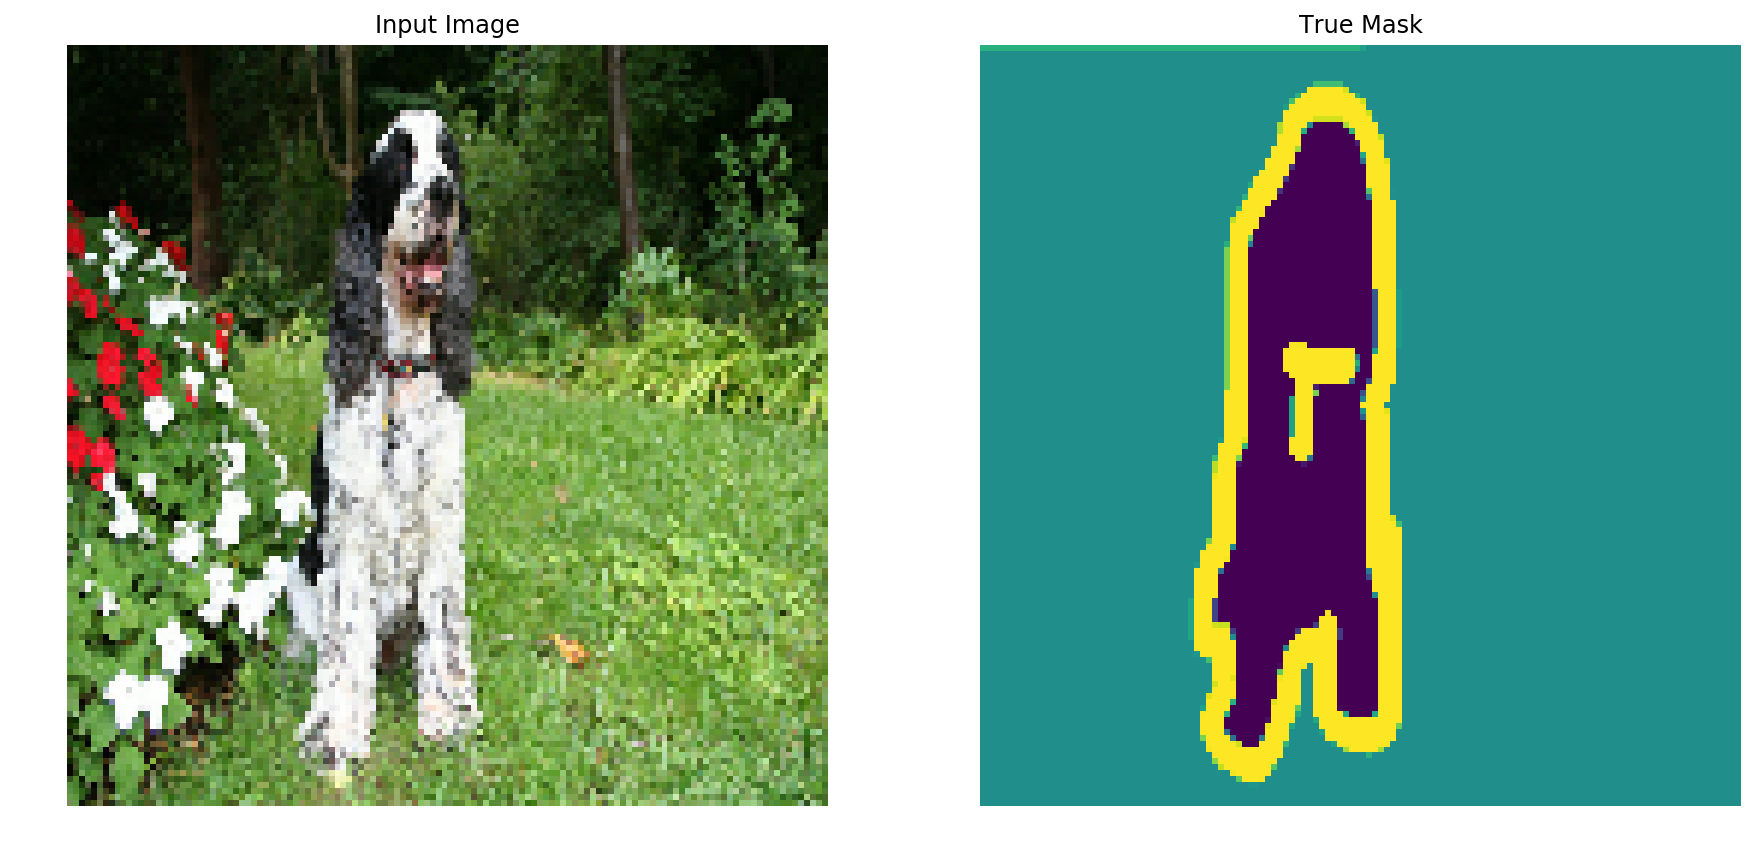

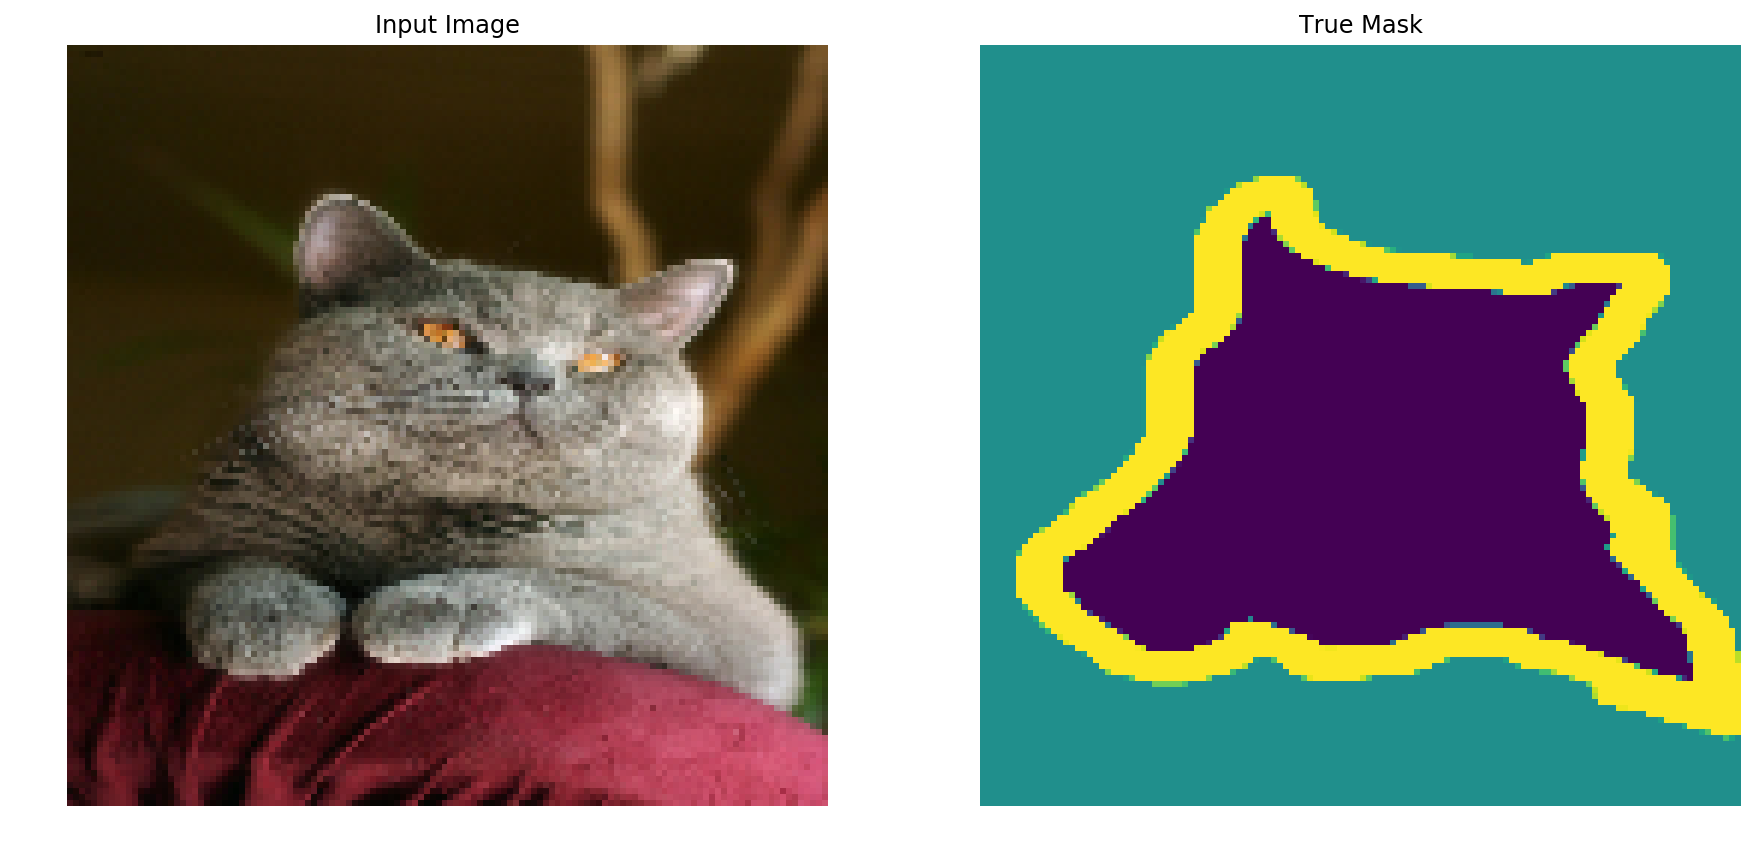

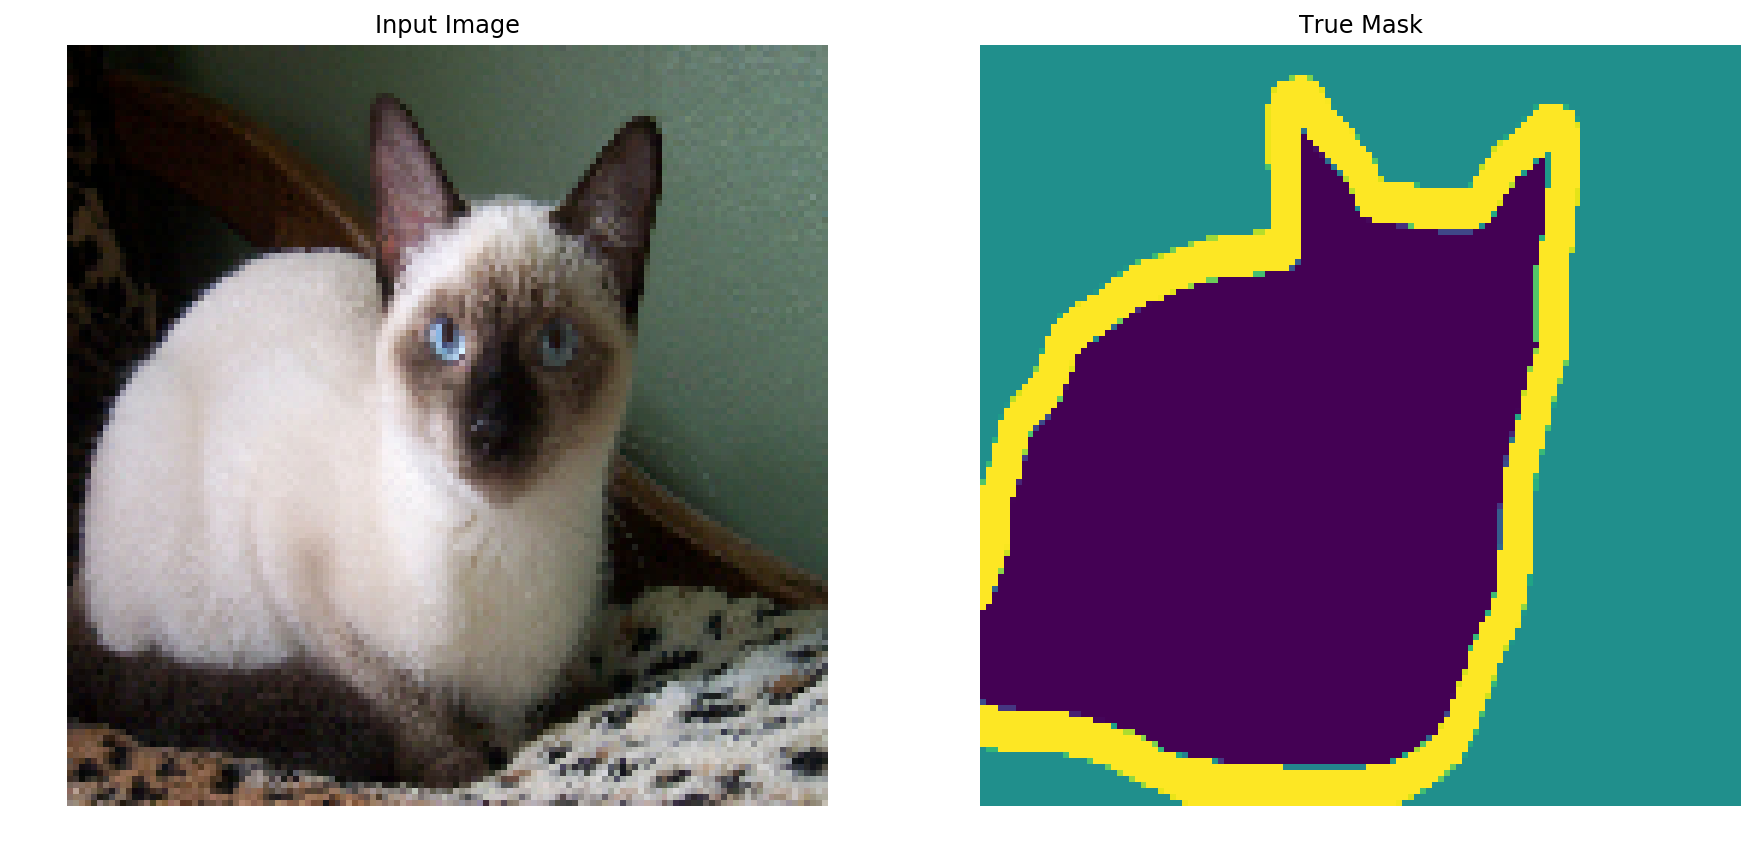

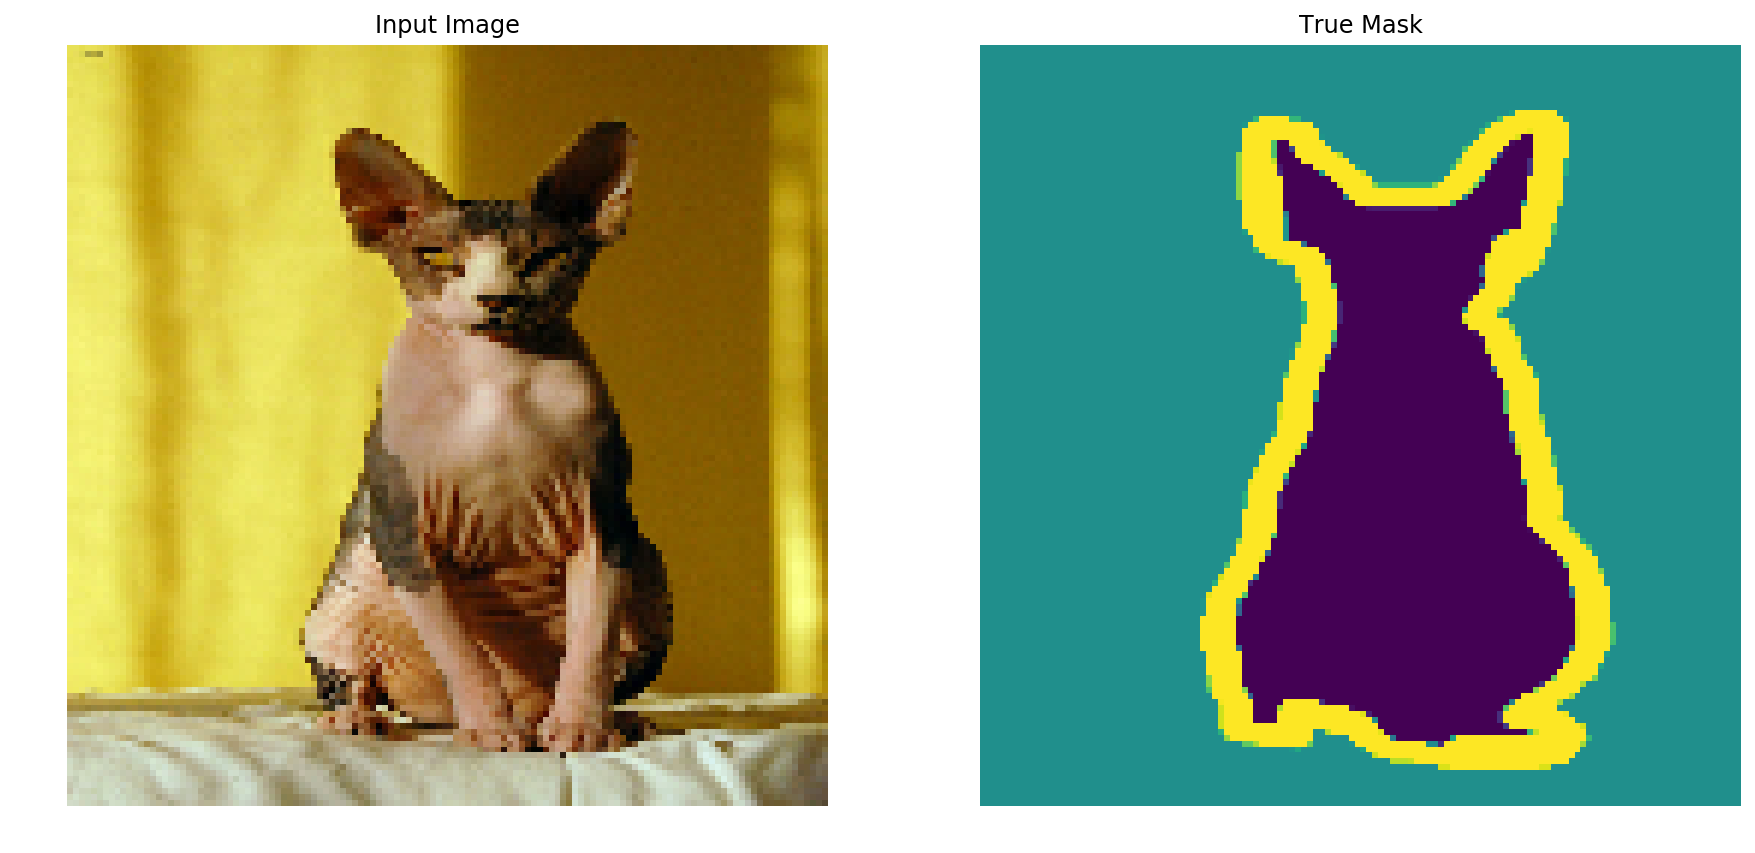

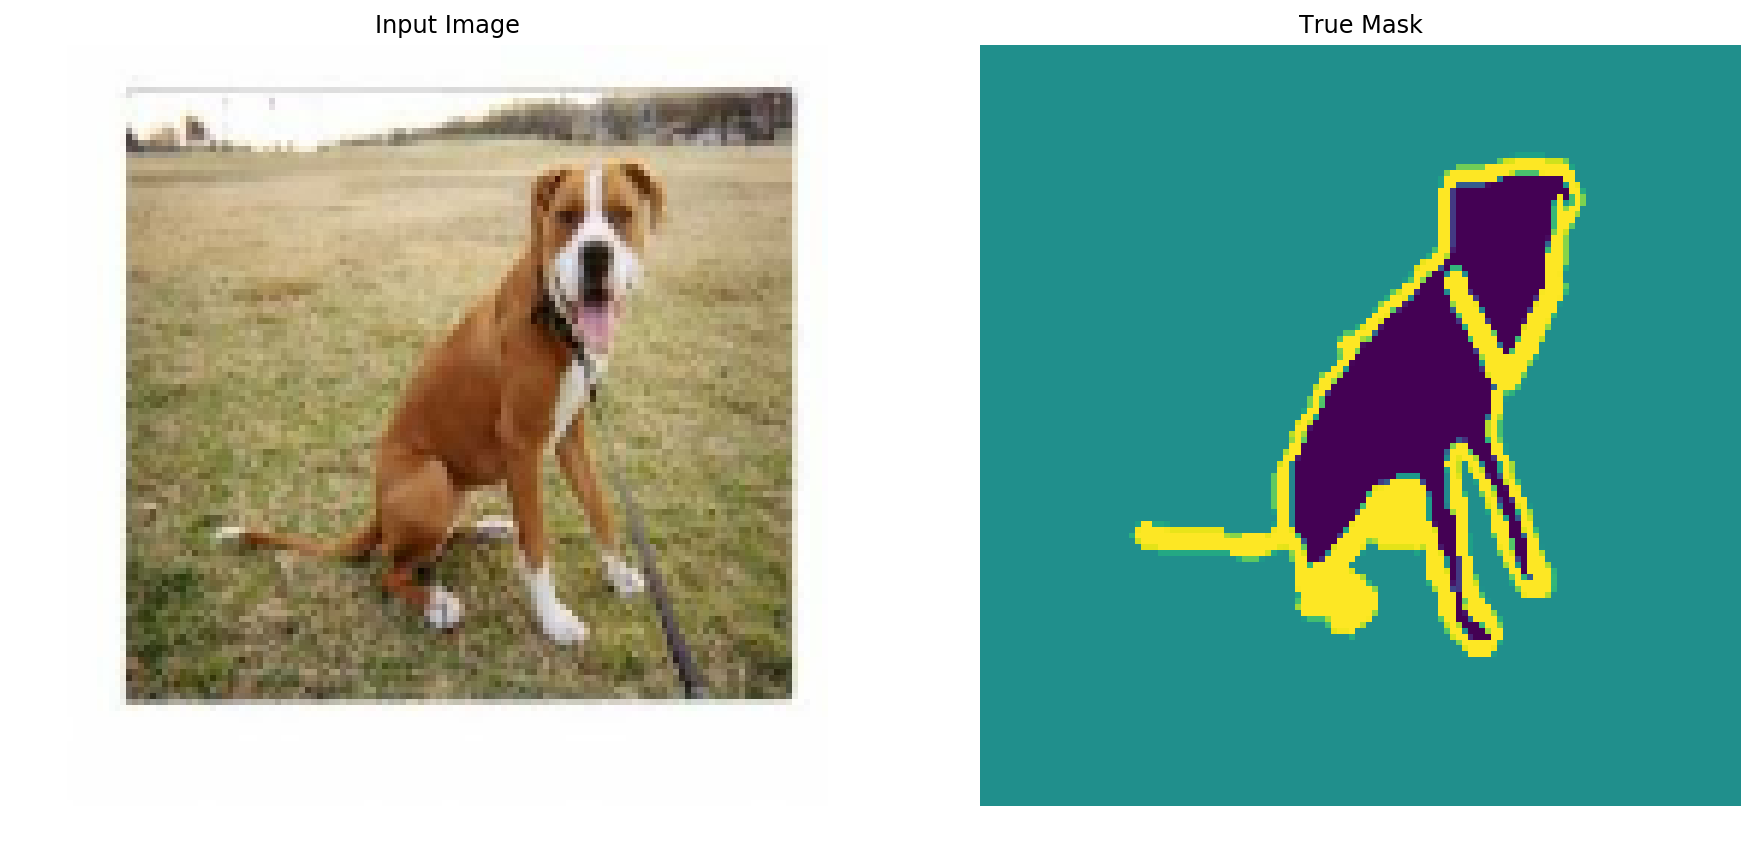

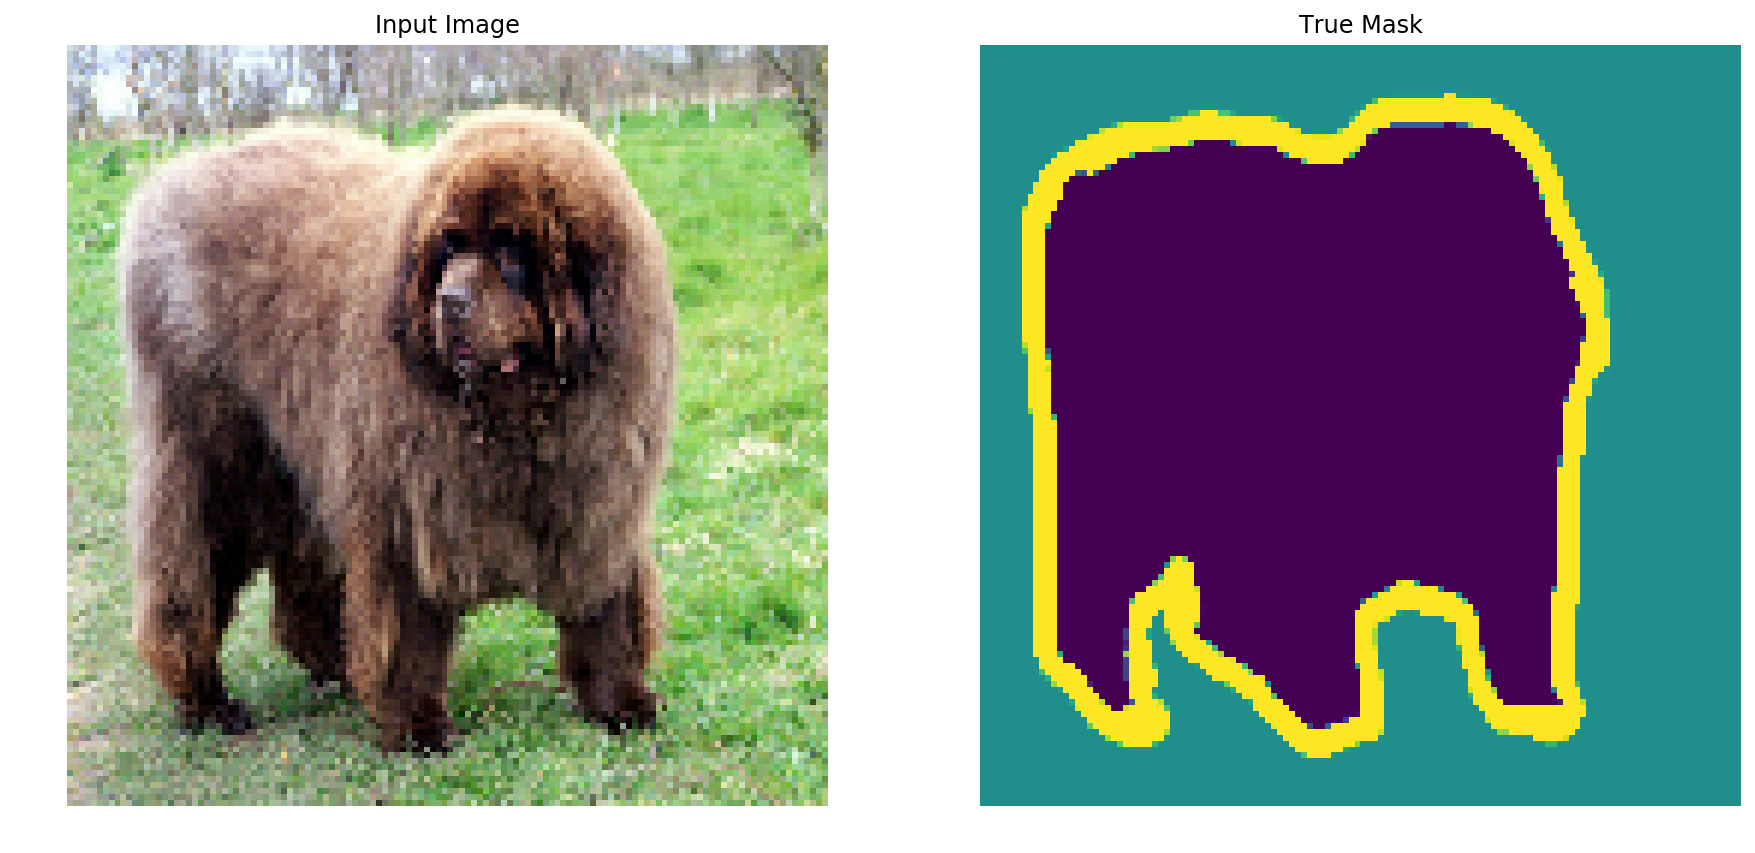

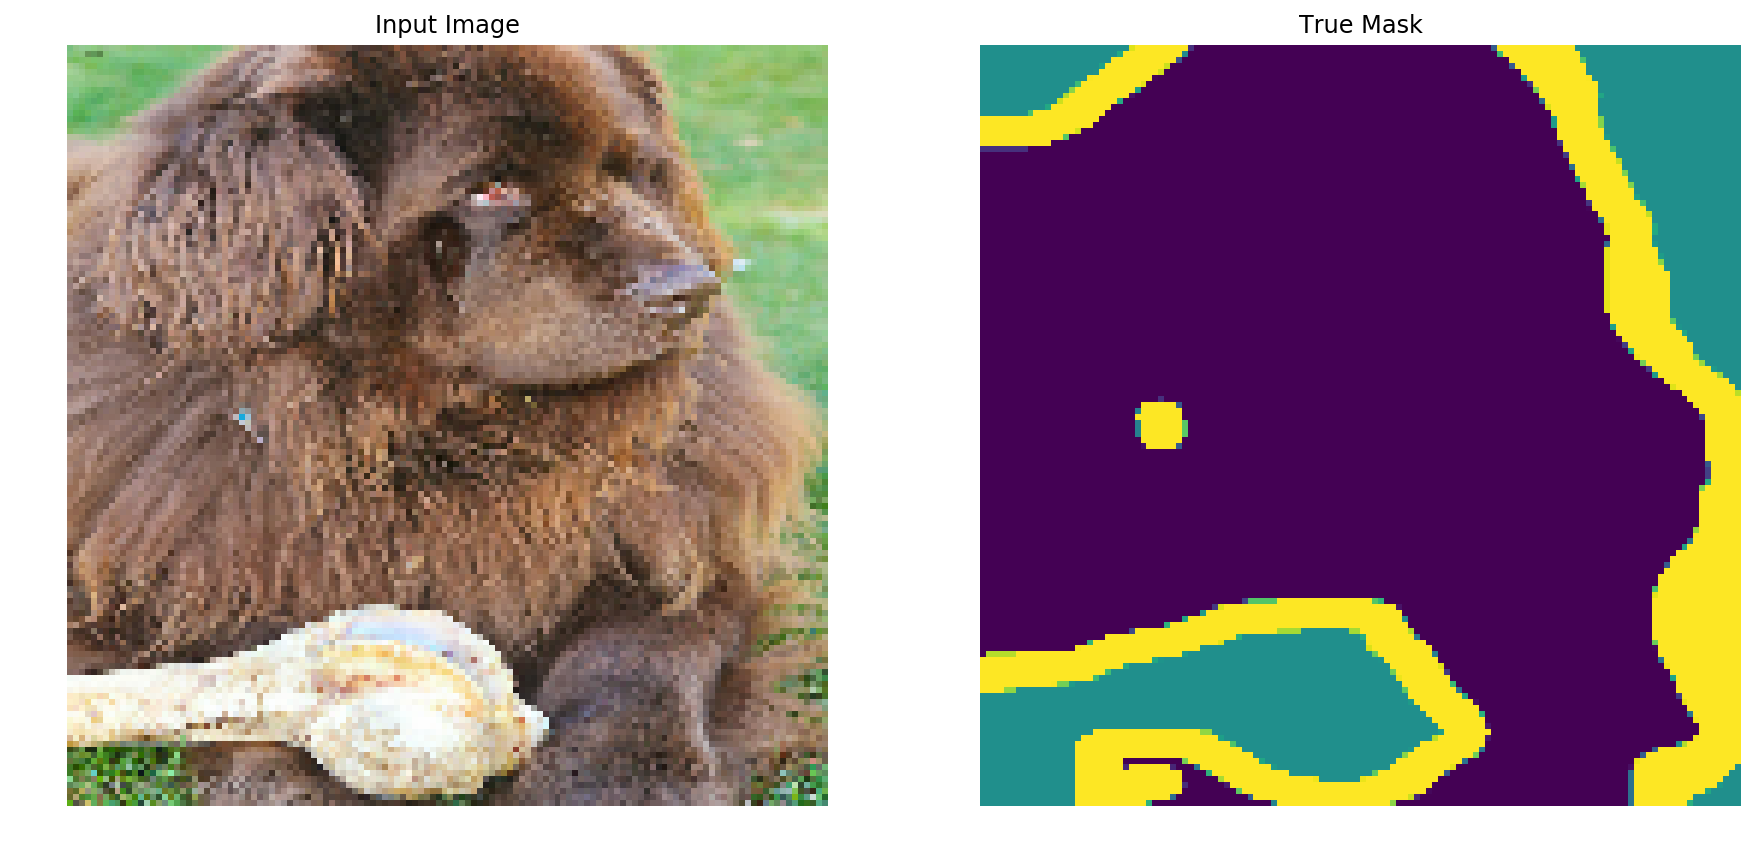

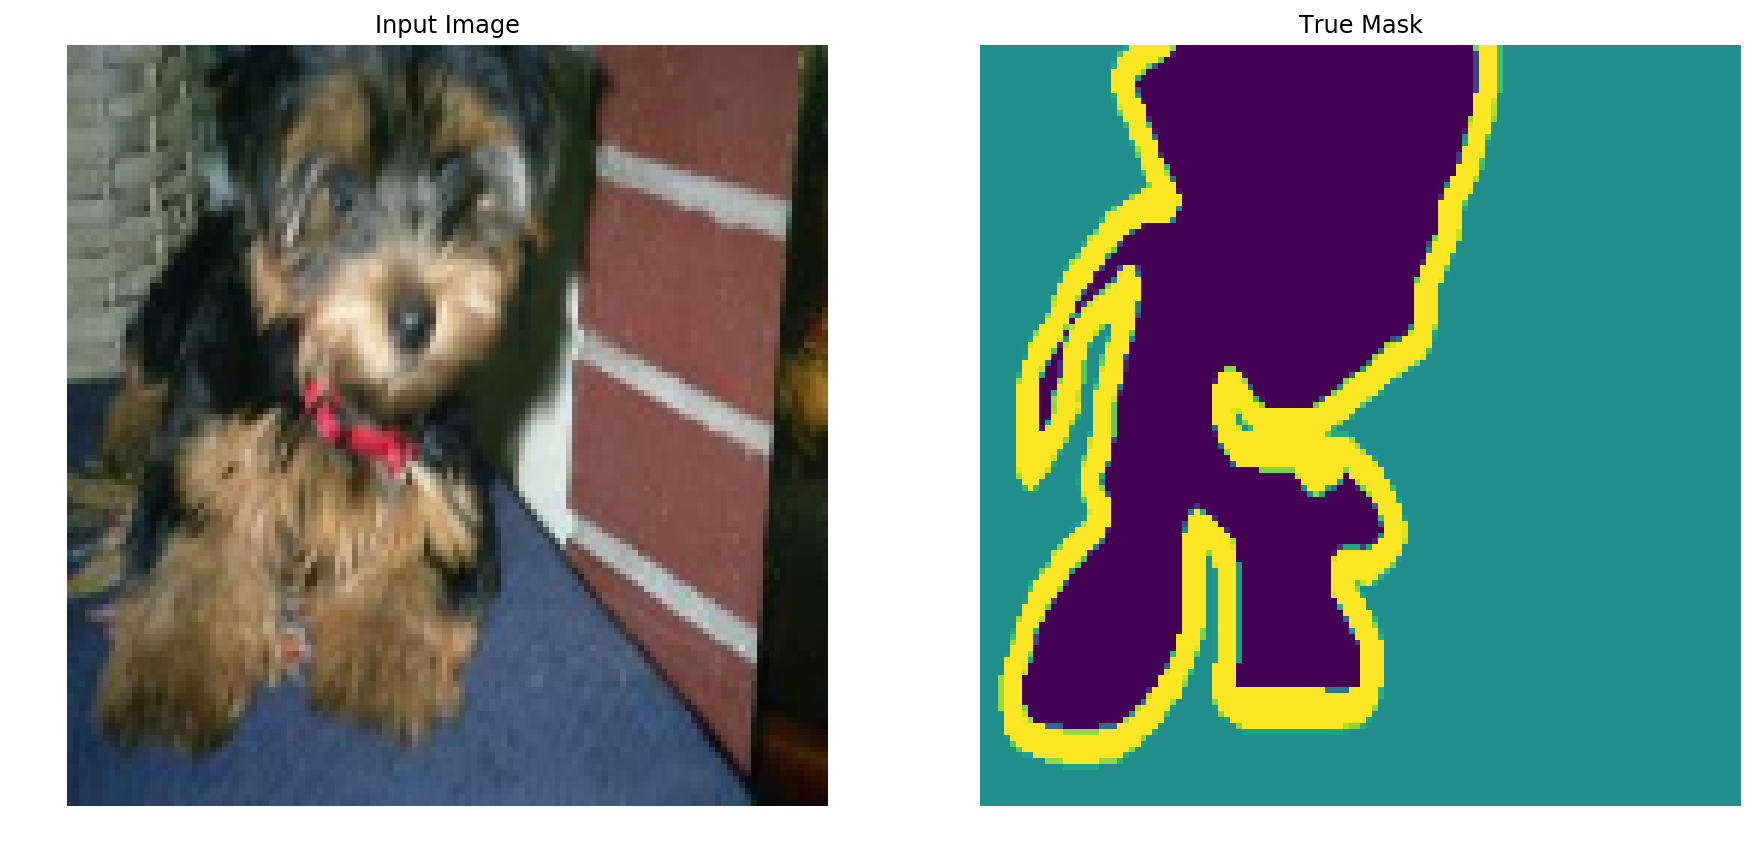

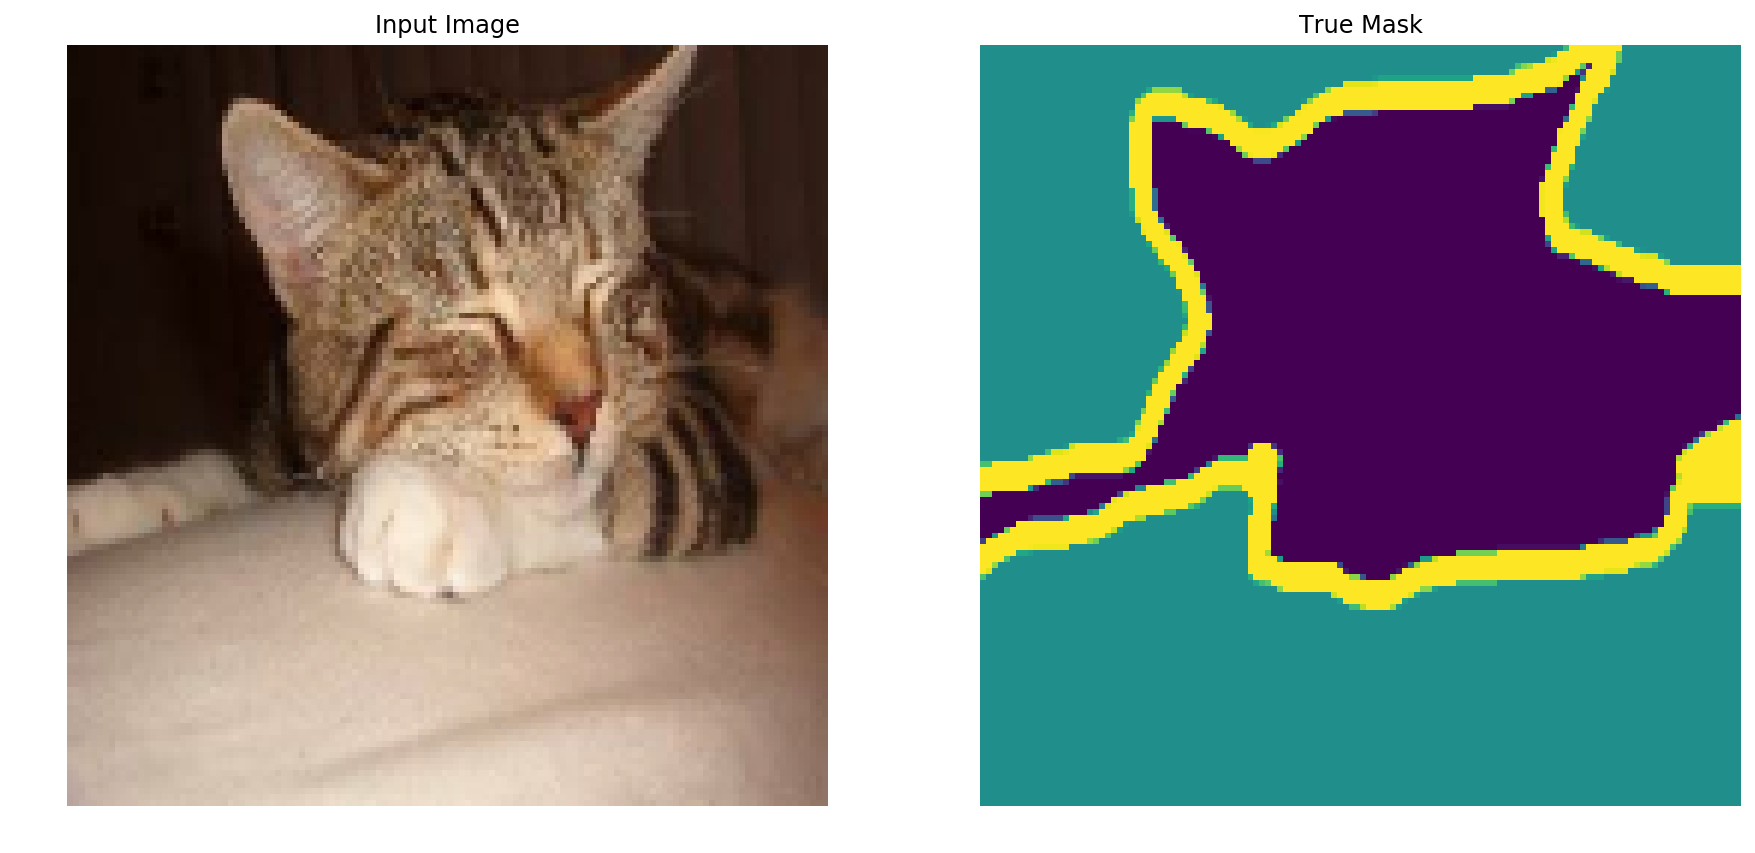

In [38]:
for image, mask in train.take(10):
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask])